# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import color
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from skimage import exposure
from skimage import filters
from skimage.filters import rank
from skimage import transform
from skimage import img_as_ubyte

from scipy import signal
from scipy.io import wavfile
from scipy import fftpack



Pretty printing has been turned OFF


## 2D - Discrete Fourier Transform
**1.1** Consider a syntetic image as following:

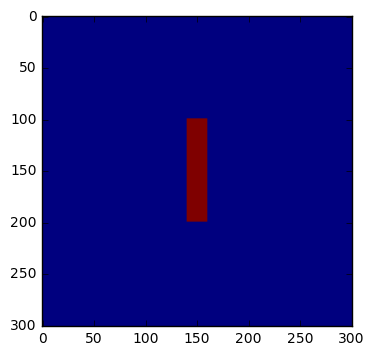

In [2]:
# Create a synthetic image
img = np.zeros((301,301))

# Draw a rectangle inside
img[100:200, 140:160] = 255

plt.figure()
plt.imshow(img)

**1.2** We can compute the FFT as follows:

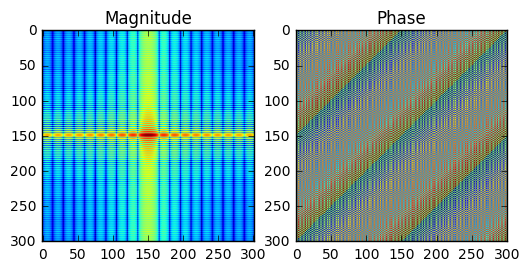

In [3]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')

ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')


**1.3** Compute the FFT of translated, rotated and other verisons of the synthetic image and illustrate the magnitude and phase of the frequency response. 

Discuss your observations

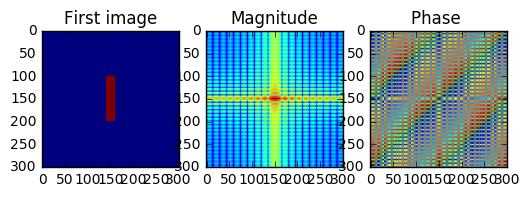

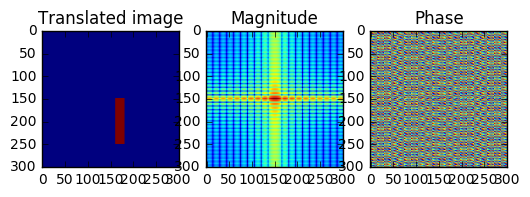

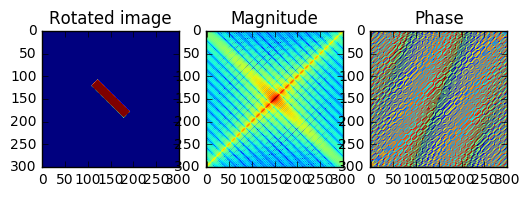

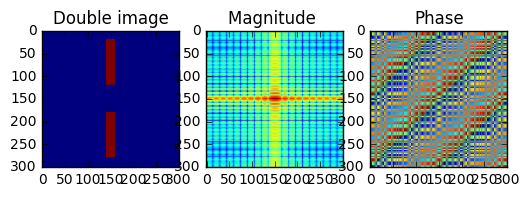

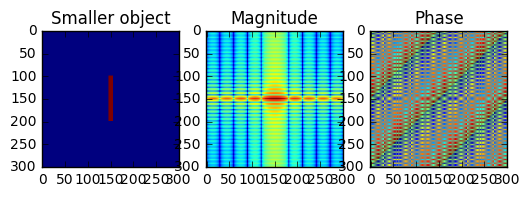

In [14]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

# Create a synthetic image
img_trans = np.zeros((301,301))
# Draw a rectangle inside
img_trans[150:250, 160:180] = 255

img_rot = transform.rotate(img, 45)

# Create a synthetic image
img2 = np.zeros((301,301))
# Draw a rectangle inside
img2[20:120, 140:160] = 255
img2[180:280, 140:160] = 255


# Create a synthetic image
img3 = np.zeros((301,301))

# Draw a rectangle inside
img3[100:200, 145:155] = 255

# Applying dft to the different images
# FFT IMG
fft_img = np.fft.fftshift(np.fft.fft2(img))

#FFT img_trans
fft_image_trans = np.fft.fftshift(np.fft.fft2(img_trans))

#FFT img_rot
fft_image_rot = np.fft.fftshift(np.fft.fft2(img_rot))

#FFT img2
fft_img2 = np.fft.fftshift(np.fft.fft2(img2))

#FFT img3
fft_img3 = np.fft.fftshift(np.fft.fft2(img3))


#Plotting first image

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img)
ax1.set_title('First image')

ax2.imshow(exposure.adjust_log(np.abs(fft_img)))
ax2.set_title('Magnitude')

ax3.imshow(np.angle(fft_img))
ax3.set_title('Phase ')

##------------------------------------

#Plotting translated image

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_trans)
ax1.set_title ('Translated image')

ax2.imshow(exposure.adjust_log(np.abs(fft_image_trans)))
ax2.set_title('Magnitude')

ax3.imshow(np.angle(fft_image_trans))
ax3.set_title('Phase')


##----------------------------
#Plotting rotated image
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_rot)
ax1.set_title('Rotated image')

ax2.imshow(exposure.adjust_log(np.abs(fft_image_rot)))
ax2.set_title('Magnitude')

ax3.imshow(np.angle(fft_image_rot))
ax3.set_title('Phase')

##-----------------------------
# PLotting img2
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img2)
ax1.set_title('Double image')

ax2.imshow(exposure.adjust_log(np.abs(fft_img2)))
ax2.set_title('Magnitude ')

ax3.imshow(np.angle(fft_img2))
ax3.set_title('Phase')

####---------------------
# PLotting img3
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(img3)
ax1.set_title('Smaller object')

ax2.imshow(exposure.adjust_log(np.abs(fft_img3)))
ax2.set_title('Magnitude')

ax3.imshow(np.angle(fft_img3))
ax3.set_title('Phase')


In [15]:
# when the image is transltated, the magnitude remains the same but the phase changes
# when the image is rotated, both the magnitude and the phase change


**1.4** Lets consider another synthetic image as follows, compute the phase and the magnitude of the followig image and display the normalized center frequency 

/Users/Sharon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Sharon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Sharon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Sharon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


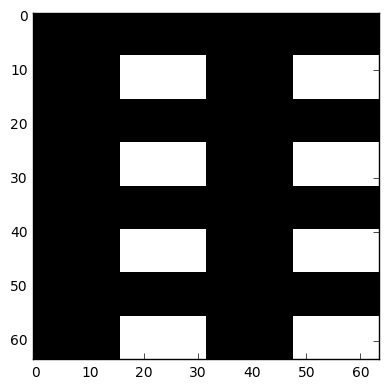

/Users/Sharon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.25
0.25


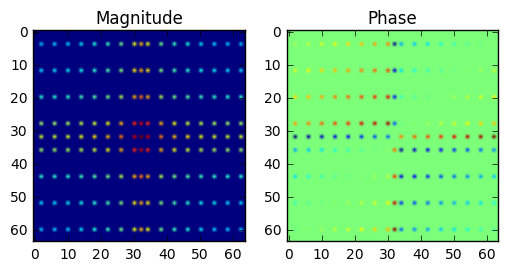

In [16]:
from PIL import Image

N = 64
Img = np.zeros((N,N))
# Length of the signal
T = 1. 
# Sampling period 
Ts = T/N 
Fs = 1./Ts
df = Fs/N
tem = np.ones((8,16))
Img[N/8:N/4, N/4:N/2] = tem 
Img[0:N/4,N/2:] = Img[0:N/4, :N/2]
Img[N/4:N/2,:] = Img[0:N/4 ,:]
Img[N/2:,:] = Img[0:N/2,:]

plt.figure
io.imshow(Img)
plt.show()

# Applying DFT
fft_Img = np.fft.fftshift(np.fft.fft2(Img))

# Plotting magnitude and phase
f, (ax2, ax3) = plt.subplots(1, 2)
ax2.imshow(exposure.adjust_log(np.abs(fft_Img)))
ax2.set_title('Magnitude')

ax3.imshow(np.angle(fft_Img))
ax3.set_title('Phase')


# obtaining the normalized center frequency
# it can be obtained by 2 differrent ways:
mag_Img = np.abs(fft_Img) / (N * N)
print ( mag_Img[N/2, N/2] ) # 1) obtaining the center of the absolute value of the FT divided by the size of the image
print(np.mean(Img)) # 2) calculating the mean of the original image




**1.5** Plot $|I_{f}(u,0)|$ and $|I_{f}(0,v)|$ with the corrrect frequency range. 

Discuss your observations.


/Users/Sharon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Sharon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<Container object of 3 artists>

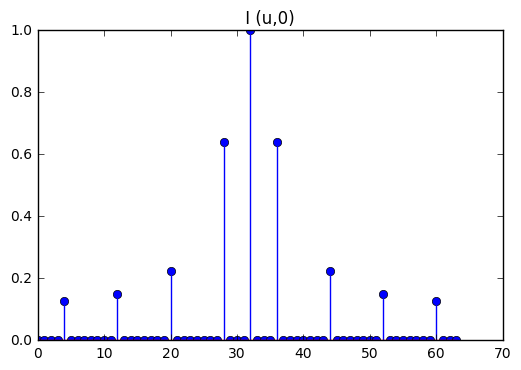

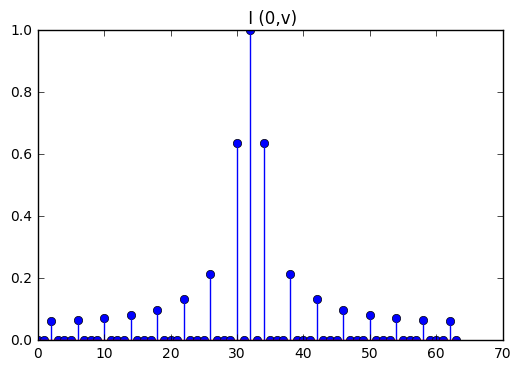

In [17]:
fft_Img_abs = np.abs( fft_Img ) * ( 1 / np.abs( fft_Img ).max() )

u = Img.shape[0] / 2
v = Img.shape[1] / 2

abs_u = fft_Img_abs[: , 0+v]
abs_v = fft_Img_abs[0+u ,  :]

plt.figure()
plt.title(' I (u,0) ')
plt.stem(abs_u)

plt.figure()
plt.title(' I (0,v)')
plt.stem(abs_v)

**1.6** Load the `lena` image, and show its phase and its magnitude, then reconstruct the image using either frequency or phase. 

ValueError: too many values to unpack (expected 1)

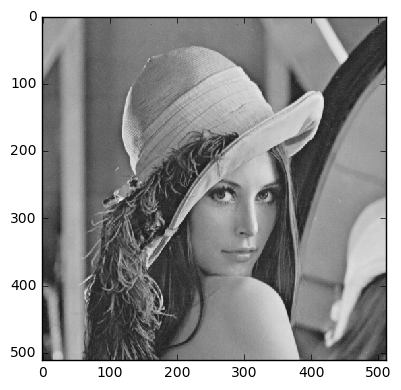

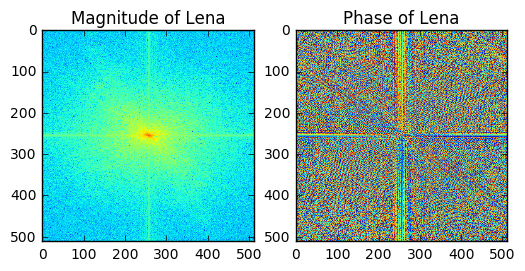

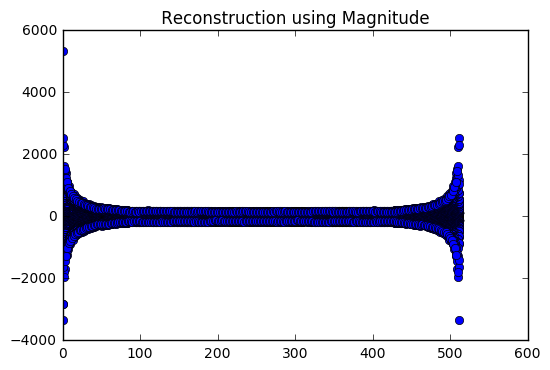

In [27]:
from skimage import io
from math import sqrt, tan, atan

# load the lena image
filename = '../images/lena-grey.bmp'

# read the image and display it
lena_im = io.imread(filename)

# Show Lena image
io.imshow(lena_im)

# Applying fft to lena image
fft_lena = np.fft.fftshift(np.fft.fft2(lena_im))

# Plotting magnitude and phase of lena
f, (ax1, ax2) = plt.subplots(1, 2)

mag_lena = exposure.adjust_log(np.abs(fft_lena))
ax1.imshow(mag_lena)
ax1.set_title('Magnitude of Lena')

phase_lena = np.angle(fft_lena)
ax2.imshow(phase_lena)
ax2.set_title('Phase of Lena')


# Reconstructing lena image with inverse FFT using only magnitude
reconst_lena_mag = np.fft.ifft2 ( np.abs (fft_lena) * np.exp (0 * 1j) )

# Reconstructing lena image with inverse FFT using only phase
reconst_lena_phase = np.fft.ifft2( 80 * np.exp ( 1j * np.angle (fft_lena) ) )

# Reconstructing lena image with IFFT using both magnitude and phase
reconst_lena_both = np.fft.ifft2 (fft_lena)


# Plotting the images of reconstructed lena
plt.figure()
plt.title(' Reconstruction using Magnitude ')
plt.stem( np.real(reconst_lena_mag), cmap = plt.cm.gray)

plt.figure()
plt.title(' Reconstruction using Phase')
plt.stem( np.real (reconst_lena_mag), cmap = plt.cm.gray)

plt.figure()
plt.title(' Reconstruction with both ')
plt.stem(reconst_lena_both, cmap = plt.cm.gray)




**1.7** Apply the sobel filter only in vertical direction to `lena` image in the frequency domain.

### Filtering in Frequency domain 

In order to build a frequency filter $H(u,v)$ from its spatial counterpart $h(x,y)$, we need to:

1. Build a zero padded spatial filter $h_p(x,y)$
1. Shift $h_p(x,y)$ by $(-1)^{x+y}$
1. Compute the DFT to obtain $H(u,v)$
1. Shift $H(u,v)$ by $(-1)^{x+y}$

In order to aboid the wraparound error, the image need to be zero padded

In order to perform the filtering, we need to:

1. Find the padded image size
1. Pad the image
1. Convert the spatial filter to frequency filter
1. Compute the DFT of the image with additional shift
1. Apply the multiplication in the Fourier space
1. Compute the inverse Fourier transform
1. Crop the image at its original size

In [ ]:
def center (f):
    freq_center = np.zeros ( (f.shape [0], f.shape[1]) )
    for i in range ( 0, f.shape [0] ):
        for j in range (0, f.shape [1] ):
            freq_center[i, j] = f[i, j] * ( (-1)**(i+j) )
            return freq_center
    
    

In [ ]:
# padding lena image
print ( lena_im.shape[1] )
p1 = 2 * lena_im.shape[0]
p2 = 2 * lena_im.shape[1]
lena_pad = np.zeros (p1, p2)
lena_pad[ 0: lena_im.shape[0], 0: lena_im.shape[1] ] = lena_im [: , :]
plt.figure()
plt.imshow ( lena_pad, cmap = plt.cm.gray )
plt.title ('Zero Padding')

# shifting the zero padded lena image
lena_shift = center(lena_pad)
plt.figure()
plt.imshow ( lena_shift, cmap = plt.cm.gray )
plt.title ('Padding and Shifting')


# applying fft2 and obtaining magnitude 
lena_fft2 = np.fft.fft2 ( lena_shift )
lena_mag = np.abs( lena_fft2 )
plt.figure()
plt.imshow ( exposure.adjust_log(lena_mag), cmap = plt.cm.gray )
plt.title ('Magnitude')

# sobel filter
sobel = np.array( [1, 2, 1], [0, 0, 0 ], [-1, -2, -1] )
sobel_sp = np.zeros(p1, p2)
sobel_sp[ 0:sobel.shape[0], 0:sobel.shape[1] ] = sobel[:,:]
sobel_sp = center (sobel_sp)
sobel_freq = np.fft.fft2(sobel_sp)

sobel_mag = np.abs(sobel_freq)
plt.figure()
plt.imshow( sobel_mag, cmap = plt.cm.gray )
plt.title('Magnitude of Sobel Filter')

#multiplying in frequency domain 
mult_freq = lena_freq * sobel_freq
mult_spat = (np.fft.ifft2(mult_freq)).real
mult_spat = center (mult_spat)

plt.figure()
plt.imshow(mult_spat, cmap = plt.cm.gray)
plt.title('Sobel Filter Before Cropping')

crop_lena = np.zeros( lena_im.shape[0], lena_im.shape[1] )
crop_lena[:, :] = mult_spat[0:mult_spat.shape[0]/2, 0:mult_spat.shape[1]/2]
plt.figure()
plt.imshow(crop_lena, cmap=plt.cm.gray)
plt.title('Sobel Filter After Cropping')


